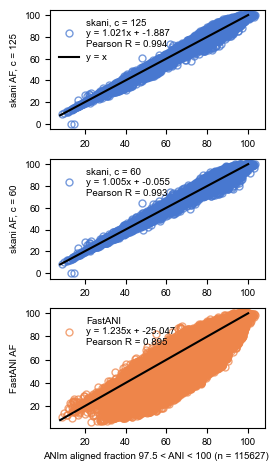

115627 115627 115627


In [78]:
import numpy as np
import glob
from scipy import stats

base = "../precomputed_results//25-50/"
anim_folders = glob.glob(base + "/anim_*")
alignment_files_anim = []
alignment_mats_skani = []
alignment_mats_skanic60 = []
alignment_files_fastani = []
anim_ani_files = []
for folder in anim_folders:
    num = folder.split('_')[-1]
    anim_file = folder + '/ANIm_alignment_coverage.tab'
    skani_file = base + 'skani_' + num +'.af'
    skani_filec60 = base + 'c60skani_' + num +'.af'
    fastani_file = base + 'fastani-list_' + num 
    anim_ani_files.append(folder + '/ANIm_percentage_identity.tab')
    alignment_files_anim.append(anim_file)
    alignment_mats_skani.append(skani_file)
    alignment_mats_skanic60.append(skani_filec60)
    alignment_files_fastani.append(fastani_file)

#test_file_anim = "../references/SGB_genome_fastas_part3/25-50/anim_5099/ANIm_alignment_coverage.tab"
#alignment_files_anim = [test_file_anim]
#test_file_skani = "../references/SGB_genome_fastas_part3/25-50/skani-robust_5099.af"
#alignment_mats_skani = [test_file_skani]

anim_pair_to_af = dict()
anim_pair_to_ani = dict()
skani_pair_to_af = dict()
c60_skani_pair_to_af = dict()
fastani_pair_to_af = dict()

for fastani_file in alignment_files_fastani:
    for line in open(fastani_file,'r'):
        spl = line.split('\t')
        gn1 = spl[0].split('/')[-1].rstrip()[0:-3]
        gn2 = spl[1].split('/')[-1].rstrip()[0:-3]
        f1 = float(spl[-2])
        f2 = float(spl[-1])
        fastani_pair_to_af[(gn1,gn2)] = f1/f2
for anim_file in alignment_files_anim:
    genome_to_ind = dict()
    ind_to_genome = dict()
    first = True
    for line in open(anim_file,'r'):
        spl = line.split('\t')
        if first:
            for genome in spl[1:]:
                ind_to_genome[len(genome_to_ind)] = genome.rstrip()
                genome_to_ind[genome] = len(genome_to_ind)
            first = False
        else:
            for i in range(1,len(spl)):
                val = float(spl[i])
                genome_i = spl[0]
                genome_j = ind_to_genome[i-1]
                #print(genome_i,genome_j,val)
                anim_pair_to_af[(genome_i,genome_j)] = val
                
for anim_file in anim_ani_files:
    genome_to_ind = dict()
    ind_to_genome = dict()
    first = True
    for line in open(anim_file,'r'):
        spl = line.split('\t')
        if first:
            for genome in spl[1:]:
                ind_to_genome[len(genome_to_ind)] = genome.rstrip()
                genome_to_ind[genome] = len(genome_to_ind)
            first = False
        else:
            for i in range(1,len(spl)):
                val = float(spl[i])
                genome_i = spl[0]
                genome_j = ind_to_genome[i-1]
                #print(genome_i,genome_j,val)
                anim_pair_to_ani[(genome_i,genome_j)] = val                

for skani_file in alignment_mats_skani:
    ind_to_genome = dict()
    first = True
    j = 0
    ind_dist_dict = dict()
    for line in open(skani_file,'r'):
        spl = line.split('\t')
        if first:
            first = False
        else:
            gn = spl[0].split('/')[-1].rstrip()[0:-3]
            ind_to_genome[len(ind_to_genome)] = gn
            for i in range(1,len(spl)):
                ind_dist_dict[(i-1,j-1)] = float(spl[i])
        j += 1
    for (key,val) in ind_dist_dict.items():
        gn_key = (ind_to_genome[key[1]],ind_to_genome[key[0]])
        skani_pair_to_af[gn_key] = val 
        
for skani_file in alignment_mats_skanic60:
    ind_to_genome = dict()
    first = True
    j = 0
    ind_dist_dict = dict()
    for line in open(skani_file,'r'):
        spl = line.split('\t')
        if first:
            first = False
        else:
            gn = spl[0].split('/')[-1].rstrip()[0:-3]
            ind_to_genome[len(ind_to_genome)] = gn
            for i in range(1,len(spl)):
                ind_dist_dict[(i-1,j-1)] = float(spl[i])
        j += 1
    for (key,val) in ind_dist_dict.items():
        gn_key = (ind_to_genome[key[1]],ind_to_genome[key[0]])
        c60_skani_pair_to_af[gn_key] = val 

Xs = []
Ys = []
Xs2 = []
Ys2 = []
Xs_c60 = []
Ys_c60 = []
#for key in skani_pair_to_af:
#    if key in anim_pair_to_af:
#        print(key)
#        x = anim_pair_to_af[key] * 100
#        y = skani_pair_to_af[key]
##        print(x,y)
#        Xs.append(x)
#        Ys.append(y)

high = 100
low = 97.5
#high =95
#low = 93
for key in fastani_pair_to_af:
    if key in skani_pair_to_af and key in c60_skani_pair_to_af:
        if anim_pair_to_ani[key] < high/100 and anim_pair_to_ani[key] > low/100:
            y_c60 = c60_skani_pair_to_af[key]
            y = skani_pair_to_af[key]
            x = anim_pair_to_af[key] * 100
    #        print(x,y)
            Xs.append(x)
            Ys.append(y)

            Ys_c60.append(y_c60)

            x = anim_pair_to_af[key] * 100
            y = fastani_pair_to_af[key] * 100
            Xs2.append(x)
            Ys2.append(y)


import matplotlib.pyplot as plt 
import seaborn as sns
cmap = sns.color_palette("muted")
fig = plt.figure(figsize=(7*cm, 12*cm))

plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.family':'arial'})
cm = 1/2.54  # centimeters in inches
c125_lr = stats.linregress(np.array(Xs), np.array(Ys))
fastani_lr = stats.linregress(np.array(Xs2), np.array(Ys2))
c60_lr = stats.linregress(np.array(Xs), np.array(Ys_c60))

smallest_val = np.min(Xs)
plt.subplot(3,1,1)
plt.plot(Xs,Ys, 'o', fillstyle='none', ms = 5, alpha = 0.75, label = f'skani, c = 125\ny = {c125_lr.slope:.3f}x + {c125_lr.intercept:.3f}\nPearson R = {c125_lr.rvalue:.3f}', c = cmap[0]);
plt.plot(range(int(smallest_val),101), range(int(smallest_val),101), c = 'black', label = 'y = x')
plt.legend(frameon=False, loc = 'upper left')
plt.ylabel("skani AF, c = 125")

plt.subplot(3,1,2)
plt.plot(Xs,Ys_c60, 'o', fillstyle='none', ms = 5, alpha = 0.75, label = f'skani, c = 60\ny = {c60_lr.slope:.3f}x + {c60_lr.intercept:.3f}\nPearson R = {c60_lr.rvalue:.3f}', c = cmap[0]);
plt.plot(range(int(smallest_val),101), range(int(smallest_val),101), c = 'black')
plt.legend(frameon=False, loc = 'upper left')
plt.ylabel("skani AF, c = 60")

plt.subplot(3,1,3)
plt.plot(Xs2,Ys2, 'o', fillstyle='none', ms = 5, alpha = 0.75, label = f'FastANI\ny = {fastani_lr.slope:.3f}x + {fastani_lr.intercept:.3f}\nPearson R = {fastani_lr.rvalue:.3f}', c = cmap[1])
plt.plot(range(int(smallest_val),101), range(int(smallest_val),101), c = 'black')
#plt.title(f"ANIm vs skani aligned fraction ({len(Xs)} comparisons), c = 125")
plt.ylabel("FastANI AF")
plt.xlabel(f"ANIm aligned fraction {low} < ANI < {high} (n = {len(Xs2)}) ")
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig(f'figures/af_{low}-{high}.png', dpi = 600, transparent = True)
plt.show()

print(len(Xs2), len(Xs), len(Ys_c60))
